### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- InvoiceNo: 거래 번호
- StockCode: 상품 코드
- Description: 상품명 
- InvoiceDate: 거래 날짜
- UnitPrice: 상품 단가
- CustomerID: 고객 번호
- Country: 국가명

### 데이터 프레임 전처리

In [1]:
import pandas as pd
import numpy as np

ci_df = pd.read_csv('./datasets/customer_invoice_data.csv')

In [2]:
ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
# 데이터 프레임 정보 출력
ci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### 결측치 처리

In [4]:
# 각 컬럼 별 결손 데이터 수 확인
ci_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# 상품명 컬럼에서 결손이 발생한 부분 삭제
ci_df = ci_df[~ ci_df['Description'].isnull()]

ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [6]:
# 고객 번호에서 결손이 발생한 행도 삭제
ci_df = ci_df[~ ci_df['CustomerID'].isnull()]

ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [7]:
# 고객 ID를 int 형식으로 변환
ci_df['CustomerID'] = ci_df['CustomerID'].astype(np.int64)

C:\Users\User\AppData\Local\Temp\ipykernel_1404\2150088291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_df['CustomerID'] = ci_df['CustomerID'].astype(np.int64)


In [8]:
# 데이터 프레임의 정보 출력
ci_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  int64  
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.9+ MB


In [9]:
# 데이터 결손 여부 출력
ci_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### 중복값 검사

In [10]:
# 중복된 행 개수 출력
ci_df.duplicated().sum()

5225

### 중복 행 제거하는 경우

In [11]:
# 중복되지 않는 행들만 가져와서 원본 원래 데이터프레임에 할당 - 중복 데이터 제거
ci_df = ci_df[~ ci_df.duplicated()]

ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


#### 이상치 제거

In [12]:
# describe 함수로 각 컬럼의 수치 정보 출력
ci_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.183273,250.283037,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401604.0,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0
CustomerID,401604.0,15281.160818,1714.006089,12346.0,13939.00,15145.00,16784.00,18287.0


In [13]:
# 구매 수량에 이상치 존재 - 음수인 부분 제거
ci_df = ci_df[~ ci_df['Quantity'] < 0]

ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [14]:
# 구매 데이터의 수치 정보 출력
ci_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,392732.0,13.153718,181.588420,1.0,2.00,6.00,12.00,80995.00
UnitPrice,392732.0,3.125596,22.240725,0.0,1.25,1.95,3.75,8142.75
CustomerID,392732.0,15287.734822,1713.567773,12346.0,13955.00,15150.00,16791.00,18287.00


In [15]:
# 각 인덱스 별 총 구매가격을 구한 다음, 새 컬럼에 추가
ci_df['TotalPrice'] = ci_df['Quantity'] * ci_df['UnitPrice']

ci_df

C:\Users\User\AppData\Local\Temp\ipykernel_1404\1863766257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_df['TotalPrice'] = ci_df['Quantity'] * ci_df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,16.60


#### 날짜 데이터 가공

In [16]:
# 오늘 날짜를 기준으로 얼마나 지났는지를 계산해주는 함수
def days_passed(x):
    return (pd.to_datetime('2024-03-29') - x).days

In [17]:
# 오늘 날짜를 기준으로 얼마나 지났는지를 나타내는 새로운 컬럼 추가
ci_df['DatePassed'] = pd.to_datetime(ci_df['InvoiceDate']).apply(days_passed)

ci_df

C:\Users\User\AppData\Local\Temp\ipykernel_1404\1541898224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_df['DatePassed'] = pd.to_datetime(ci_df['InvoiceDate']).apply(days_passed)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DatePassed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,4866
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,4866
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,10.20,4493
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12.60,4493
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,16.60,4493
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,16.60,4493


In [18]:
# 인덱스 번호 초기화
ci_df.reset_index(drop=True, inplace=True)

ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DatePassed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,4866
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,4866
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866
...,...,...,...,...,...,...,...,...,...,...
392727,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,10.20,4493
392728,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12.60,4493
392729,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,16.60,4493
392730,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,16.60,4493


### RFM 점수에 따른 등급 부여

#### 고객 ID를 기준으로 RFM 데이터 통합

In [19]:
# 고객 별 주문 횟수
ci_df['CustomerID'].value_counts()

CustomerID
17841    7676
14911    5672
14096    5111
12748    4413
14606    2677
         ... 
17747       1
16737       1
18184       1
15313       1
13106       1
Name: count, Length: 4339, dtype: int64

In [20]:
# 새로운 데이터 프레임에 RFM 데이터만 추가

# R (Recency) - 회원 별 가장 최근에 주문한 날로부터 지난 시간
rfm_r = ci_df.groupby('CustomerID')['DatePassed'].min().reset_index()
rfm_r.columns = ['ID', 'Recency']

# F (Frequency) - 회원 별 주문 횟수
rfm_f = ci_df['CustomerID'].value_counts().reset_index()
rfm_f.columns = ['ID', 'Frequency']

# M (Monetary) - 회원 별 총 결제 금액
rfm_m = ci_df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
rfm_m.columns = ['ID', 'Monetary']

# 각각의 데이터 프레임 전부 합치기
rfm = pd.merge(rfm_r, rfm_f, on="ID")
rfm = pd.merge(rfm, rfm_m, on="ID")

# 완성된 RFM 데이터 프레임 표시
display(rfm)

,ID,Recency,Frequency,Monetary
0,12346,4818,1,77183.60
1,12347,4495,182,4310.00
2,12348,4568,31,1797.24
3,12349,4511,73,1757.55
4,12350,4803,17,334.40
...,...,...,...,...
4334,18280,4770,10,180.60
4335,18281,4673,7,80.82
4336,18282,4500,12,178.05
4337,18283,4496,721,2045.53


#### 데이터 정규화

In [21]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 정규화 메소드
normalizer = MinMaxScaler()

# 기존 데이터 프레임에 있던 데이터에 정규화 실행
rfm[['Recency', 'Frequency', 'Monetary']] = \
                                    normalizer.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

display(rfm)

,ID,Recency,Frequency,Monetary
0,12346,0.871314,0.000000,0.275453
1,12347,0.005362,0.023583,0.015382
2,12348,0.201072,0.003909,0.006414
3,12349,0.048257,0.009381,0.006272
4,12350,0.831099,0.002085,0.001193
...,...,...,...,...
4334,18280,0.742627,0.001173,0.000645
4335,18281,0.482574,0.000782,0.000288
4336,18282,0.018767,0.001433,0.000635
4337,18283,0.008043,0.093811,0.007300


In [22]:
# Recency에 있는 데이터 수정
# 최근에 주문한 것이 점수가 높아야 하기 때문에 1에서 기존 점수를 뺀 값을 새롭게 할당 
rfm['Recency'] = 1 - rfm['Recency']

rfm

,ID,Recency,Frequency,Monetary
0,12346,0.128686,0.000000,0.275453
1,12347,0.994638,0.023583,0.015382
2,12348,0.798928,0.003909,0.006414
3,12349,0.951743,0.009381,0.006272
4,12350,0.168901,0.002085,0.001193
...,...,...,...,...
4334,18280,0.257373,0.001173,0.000645
4335,18281,0.517426,0.000782,0.000288
4336,18282,0.981233,0.001433,0.000635
4337,18283,0.991957,0.093811,0.007300


In [23]:
# RFM 총점 산출해서 새로운 컬럼에 추가
rfm['TotalScore'] = rfm[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
rfm

,ID,Recency,Frequency,Monetary,TotalScore
0,12346,0.128686,0.000000,0.275453,0.404139
1,12347,0.994638,0.023583,0.015382,1.033603
2,12348,0.798928,0.003909,0.006414,0.809250
3,12349,0.951743,0.009381,0.006272,0.967396
4,12350,0.168901,0.002085,0.001193,0.172179
...,...,...,...,...,...
4334,18280,0.257373,0.001173,0.000645,0.259190
4335,18281,0.517426,0.000782,0.000288,0.518496
4336,18282,0.981233,0.001433,0.000635,0.983302
4337,18283,0.991957,0.093811,0.007300,1.093068


In [24]:
# RFM 데이터프레임 컬럼명을 기존 데이터와 똑같이 변경
rfm = rfm.rename(columns={"ID": "CustomerID"})

In [25]:
rfm

,CustomerID,Recency,Frequency,Monetary,TotalScore
0,12346,0.128686,0.000000,0.275453,0.404139
1,12347,0.994638,0.023583,0.015382,1.033603
2,12348,0.798928,0.003909,0.006414,0.809250
3,12349,0.951743,0.009381,0.006272,0.967396
4,12350,0.168901,0.002085,0.001193,0.172179
...,...,...,...,...,...
4334,18280,0.257373,0.001173,0.000645,0.259190
4335,18281,0.517426,0.000782,0.000288,0.518496
4336,18282,0.981233,0.001433,0.000635,0.983302
4337,18283,0.991957,0.093811,0.007300,1.093068


#### 데이터프레임에 RFM 점수 적용

In [26]:
# RFM 점수가 추가된 새로운 데이터프레임 생성
ci_rfm_df = pd.merge(ci_df, rfm, on="CustomerID")

ci_rfm_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DatePassed,Recency,Frequency,Monetary,TotalScore
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,4866,0.002681,0.038567,0.019240,0.060488
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866,0.002681,0.038567,0.019240,0.060488
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,4866,0.002681,0.038567,0.019240,0.060488
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866,0.002681,0.038567,0.019240,0.060488
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866,0.002681,0.038567,0.019240,0.060488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392727,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713,Germany,15.00,4493,1.000000,0.004821,0.003028,1.007849
392728,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713,Germany,10.20,4493,1.000000,0.004821,0.003028,1.007849
392729,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713,Germany,10.20,4493,1.000000,0.004821,0.003028,1.007849
392730,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713,Germany,24.96,4493,1.000000,0.004821,0.003028,1.007849


In [27]:
# RFM 컬럼 제거
drop_columns = ['Recency', 'Frequency', 'Monetary']

ci_rfm_df = ci_rfm_df.drop(labels=drop_columns, axis=1)

ci_rfm_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DatePassed,TotalScore
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,4866,0.060488
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866,0.060488
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,4866,0.060488
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866,0.060488
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866,0.060488
...,...,...,...,...,...,...,...,...,...,...,...
392727,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713,Germany,15.00,4493,1.007849
392728,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713,Germany,10.20,4493,1.007849
392729,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713,Germany,10.20,4493,1.007849
392730,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713,Germany,24.96,4493,1.007849


#### 등급 분류

In [28]:
import numpy as np

# 등급 분류의 기준이 될 RFM 점수 퍼센티지 설정 - 총 5단계로 구분
l1, l2, l3, l4 = np.percentile(ci_rfm_df['TotalScore'], [10, 40, 70, 90])

print(l1, l2, l3, l4)

0.7173957235500227 0.9704333446511407 1.0426212069728902 1.2409283746056177


In [29]:
# 위의 퍼센티지에 따라 사용자 등급을 구분해줄 함수 선언
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2
    return 1

In [30]:
# 등급 분류 함수를 TotalScore에 적용한 결과값을 담을 새 컬럼 생성
ci_rfm_df['Level'] = ci_rfm_df['TotalScore'].apply(get_level)

ci_rfm_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DatePassed,TotalScore,Level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,4866,0.060488,5
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866,0.060488,5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,4866,0.060488,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866,0.060488,5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866,0.060488,5
...,...,...,...,...,...,...,...,...,...,...,...,...
392727,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713,Germany,15.00,4493,1.007849,3
392728,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713,Germany,10.20,4493,1.007849,3
392729,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713,Germany,10.20,4493,1.007849,3
392730,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713,Germany,24.96,4493,1.007849,3


In [31]:
# 등급 이름을 문자열로 변경
ci_rfm_df['Level'] = ci_rfm_df['Level'].replace([5, 4, 3, 2, 1], ['Normal', 'Bronze', 'Silver', 'Gold', 'Platinum'])

ci_rfm_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DatePassed,TotalScore,Level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,4866,0.060488,Normal
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866,0.060488,Normal
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,4866,0.060488,Normal
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866,0.060488,Normal
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866,0.060488,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
392727,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713,Germany,15.00,4493,1.007849,Silver
392728,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713,Germany,10.20,4493,1.007849,Silver
392729,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713,Germany,10.20,4493,1.007849,Silver
392730,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713,Germany,24.96,4493,1.007849,Silver


In [32]:
# 전체 등급이 적용되었는지 확인
ci_rfm_df['Level'].value_counts()

Level
Bronze      117802
Silver      117776
Gold         79677
Normal       39342
Platinum     38135
Name: count, dtype: int64

In [33]:
# 총점 컬럼 삭제
ci_rfm_df = ci_rfm_df.drop(labels=['TotalScore'], axis=1)

ci_rfm_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DatePassed,Level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,4866,Normal
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866,Normal
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,4866,Normal
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866,Normal
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866,Normal
...,...,...,...,...,...,...,...,...,...,...,...
392727,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713,Germany,15.00,4493,Silver
392728,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713,Germany,10.20,4493,Silver
392729,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713,Germany,10.20,4493,Silver
392730,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713,Germany,24.96,4493,Silver


### 마케팅 전략 수립

#### 데이터 시각화

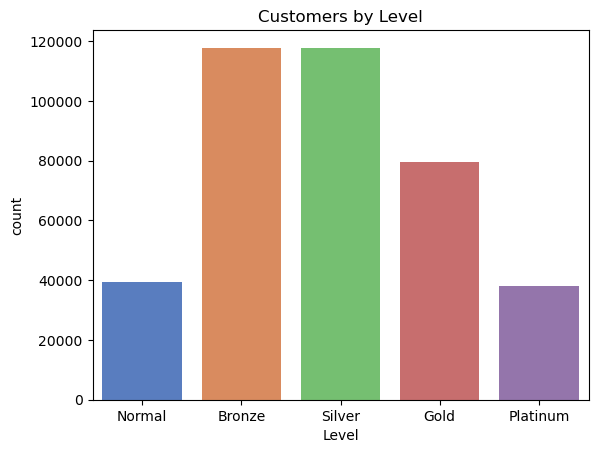

In [34]:
# 등급 별 회원 수를 막대 그래프로 시각화
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Normal', 'Bronze', 'Silver', 'Gold', 'Platinum']

sns.countplot(x="Level", data=ci_rfm_df, palette='muted', order=order)
plt.title('Customers by Level')
plt.show()

In [35]:
# 국가 별 거래 횟수 출력
ci_rfm_df['Country'].value_counts()

Country
United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


In [36]:
# 거래 횟수가 가장 많은 영국만 분리
uk_ci_df = ci_rfm_df[ci_rfm_df['Country'] == 'United Kingdom']

uk_ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DatePassed,Level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,4866,Normal
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866,Normal
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,4866,Normal
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866,Normal
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,4866,Normal
...,...,...,...,...,...,...,...,...,...,...,...
392689,581416,22809,SET OF 6 T-LIGHTS SANTA,1,12/8/2011 14:58,2.95,14569,United Kingdom,2.95,4494,Silver
392690,581416,22807,SET OF 6 T-LIGHTS TOADSTOOLS,2,12/8/2011 14:58,1.25,14569,United Kingdom,2.50,4494,Silver
392691,581416,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,12/8/2011 14:58,2.10,14569,United Kingdom,2.10,4494,Silver
392692,581416,22809,SET OF 6 T-LIGHTS SANTA,2,12/8/2011 14:58,2.95,14569,United Kingdom,5.90,4494,Silver


In [37]:
# 영국의 데이터만 모았으니 국가 컬럼 삭제
uk_ci_df = uk_ci_df.drop(labels="Country", axis=1)

uk_ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,DatePassed,Level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,15.30,4866,Normal
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,20.34,4866,Normal
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,22.00,4866,Normal
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,20.34,4866,Normal
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,20.34,4866,Normal
...,...,...,...,...,...,...,...,...,...,...
392689,581416,22809,SET OF 6 T-LIGHTS SANTA,1,12/8/2011 14:58,2.95,14569,2.95,4494,Silver
392690,581416,22807,SET OF 6 T-LIGHTS TOADSTOOLS,2,12/8/2011 14:58,1.25,14569,2.50,4494,Silver
392691,581416,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,12/8/2011 14:58,2.10,14569,2.10,4494,Silver
392692,581416,22809,SET OF 6 T-LIGHTS SANTA,2,12/8/2011 14:58,2.95,14569,5.90,4494,Silver


In [38]:
# 영국에 수출된 물품 종류 출력
uk_ci_df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    1929
JUMBO BAG RED RETROSPOT               1461
REGENCY CAKESTAND 3 TIER              1417
ASSORTED COLOUR BIRD ORNAMENT         1320
PARTY BUNTING                         1301
                                      ... 
GLASS CAKE COVER AND PLATE               1
PINK SMALL GLASS CAKE STAND              1
TURQ ICE CREAM BUM BAG                   1
PINK CHERRY LIGHTS                       1
LETTER "Z" BLING KEY RING                1
Name: count, Length: 3844, dtype: int64

In [39]:
# 영국에 가장 많이 수출된 물품 10가지로 이루어진 데이터프레임 생성
value_counts = uk_ci_df['Description'].value_counts()

top_10_products = value_counts.head(10)

uk_ci_df_top_10 = uk_ci_df[uk_ci_df['Description'].isin(top_10_products.index)]

uk_ci_df_top_10

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,DatePassed,Level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,15.30,4866,Normal
11,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:02,2.55,17850,15.30,4866,Normal
27,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:32,2.55,17850,15.30,4866,Normal
45,536396,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 10:51,2.55,17850,15.30,4866,Normal
65,536406,85123A,WHITE HANGING HEART T-LIGHT HOLDER,8,12/1/2010 11:33,2.55,17850,20.40,4866,Normal
...,...,...,...,...,...,...,...,...,...,...
392214,580731,22086,PAPER CHAIN KIT 50'S CHRISTMAS,1,12/5/2011 17:36,2.95,17383,2.95,4497,Silver
392273,580772,84879,ASSORTED COLOUR BIRD ORNAMENT,8,12/6/2011 11:00,1.69,15992,13.52,4496,Silver
392553,581142,47566,PARTY BUNTING,3,12/7/2011 13:38,4.95,14204,14.85,4495,Silver
392583,581149,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,12/7/2011 14:12,2.55,15471,81.60,4495,Silver


In [41]:
top_10_products

Description
WHITE HANGING HEART T-LIGHT HOLDER    1929
JUMBO BAG RED RETROSPOT               1461
REGENCY CAKESTAND 3 TIER              1417
ASSORTED COLOUR BIRD ORNAMENT         1320
PARTY BUNTING                         1301
LUNCH BAG RED RETROSPOT               1135
LUNCH BAG  BLACK SKULL.               1022
SET OF 3 CAKE TINS PANTRY DESIGN      1013
PAPER CHAIN KIT 50'S CHRISTMAS         967
HEART OF WICKER SMALL                  946
Name: count, dtype: int64

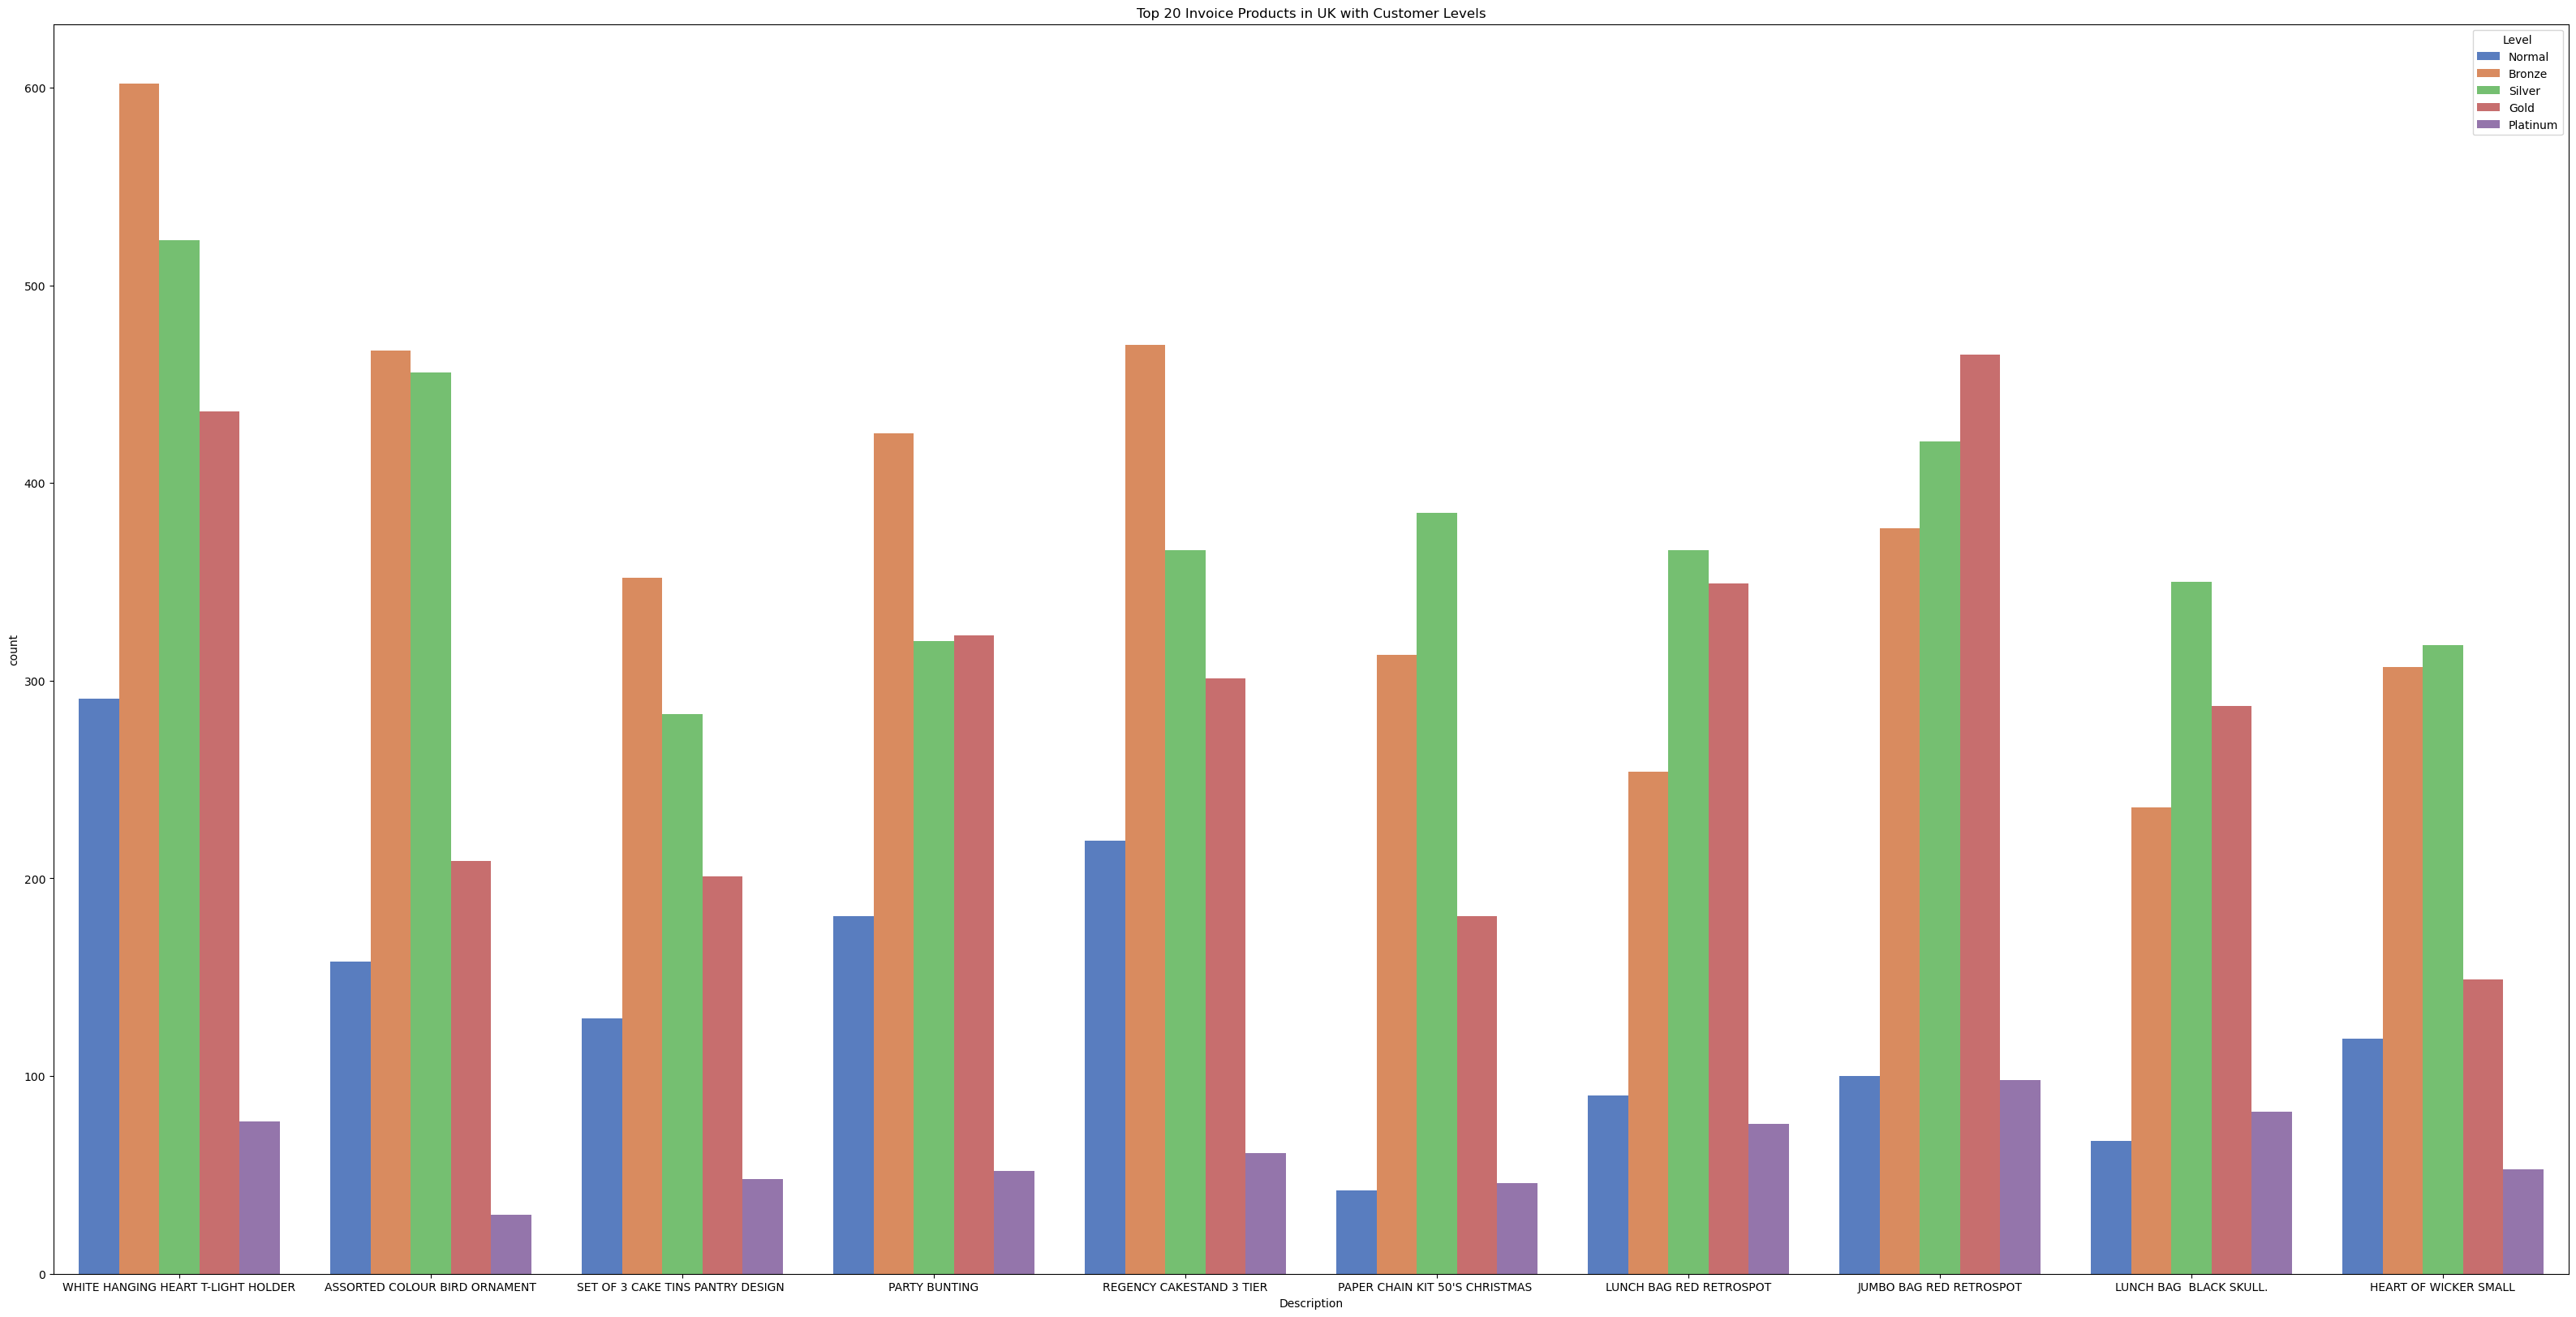

In [40]:
# 각 물품 별 구매한 회원 등급 분포를 막대 그래프로 출력
plt.figure(figsize=(40, 20))

sns.countplot(x="Description", hue="Level", data=uk_ci_df_top_10, palette='muted', hue_order=order)
plt.title("Top 20 Invoice Products in UK with Customer Levels")

plt.show()

#### 마케팅 전략 제시
- '백색 걸이형 T-라이트 홀더'와 '다양한 색의 새 장식품' 제품이 영국에서 가장 많이 거래된 물품인 만큼,  
  해당 물품에 대한 수요가 비교적 적은 Platinum 고객층을 중심으로 이 두 물품에 대한 적극적인 마케팅을 진행할 필요가 있습니다.
- 반면, '1950년대 풍 크리스마스 종이 체인 키트'와 '레트로 풍 점보 레드 백' 물품은  
  Normal 및 Bronze 고객층에게 상대적으로 수요가 적게 나타난 만큼, 해당 등급의 고객들에게
  이 제품들에 대한 프로모션을 진행함으로서 다른 등급의 고객들의 수요 역시 증가하는 효과를 볼 수 있을 것입니다.